Part 4: CLASSIFICATION USING FULL BAYESIAN + PREDICTIVE DISTRIBUTION （CHEN ZIGENG A0260093L)

1. This is an example code to generate classification data of two classes

2. Based on the code above, generate data similar to:

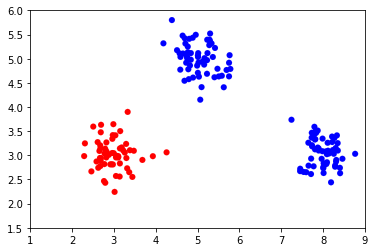

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def Gaussian_basis(x,mu,s):
    res = np.exp(-((x-mu)**2).sum()/(2*(s**2)))
    return res
    #return np.exp(-1 * linalg.norm(mu - x)**2 / (2 * s ** 2))

def sigmoid_function(a):
    res = 1/(1+np.exp(-a))
    return res

N1 = 60
N2 = 60
K = 2
sigma = 0.1

mean = (3,3)
cov = [[sigma,0],[0,sigma]]
X1 = np.random.multivariate_normal(mean,cov,N1)
C1 = ["red"] * len(X1)
T1 = np.zeros([len(X1),1])

mean = (5,5)
cov = [[sigma,0],[0,sigma]]
X2 = np.random.multivariate_normal(mean,cov,N1)
C2 = ["blue"] * len(X2)
T2 = np.ones([len(X2),1])

mean = (8,3)
cov = [[sigma,0],[0,sigma]]
X3 = np.random.multivariate_normal(mean,cov,N1)
C3 = ["blue"] * len(X3)
T3 = np.ones([len(X3),1])

X = np.concatenate([X1,X2,X3])
color = np.concatenate([C1,C2,C3])
T = np.concatenate([T1,T2,T3])

plt.scatter(X[:,0],X[:,1],marker='o',c=color,linewidths=0.1)
plt.xlim([1,9])
plt.ylim([1.5,6])
plt.show()


3. Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map:

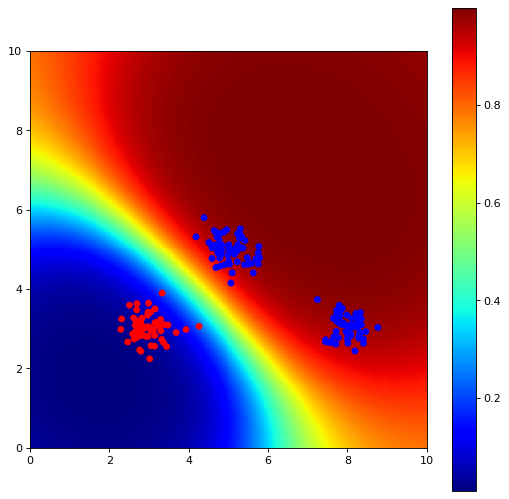

In [2]:
M = 8
mo = 0
alpha = 2.5
ss0i = (1/alpha)*np.identity(M+1)
ss0 = (alpha)*np.identity(M+1)
w = np.zeros([M+1,1])
wnew = np.zeros([M+1,1])
s = 3.3

N = len(X)
mxt = np.zeros((N, M + 1))
vy = np.zeros((N, 1))
I = np.identity(M + 1)

for n in range(0, N):
    vy[n][0] = T[n]
    for m in range(0, M + 1):
        if m == 0:
            mxt[n][m] = 1
        else:
            mxt[n][m] = Gaussian_basis(X[n], 10*m/(M+1), s)


for i in range(300):
    w = wnew
    sign = sigmoid_function(np.dot(mxt, w))
    R = np.identity(len(X))
    for k in range(len(X)):
        R[k][k] = sign[k]*[1-sign[k]]
    H = ss0i + np.dot(mxt.T,np.dot(R,mxt))
    ssni = H
    deltaE = np.dot(ss0i, w) + np.dot(mxt.T, sign - T)
    wnew = w - np.dot(linalg.pinv(H),deltaE)

w = wnew
long = 200
Tmap = np.zeros([long,long])
pie = math.pi
ssn = np.linalg.pinv(ssni)

for i in range(long):
    for j in range(long):
        x1 = 10*i/long
        y1 = 10*j/long
        xy = np.array([x1,y1])
        fi = np.zeros([1,M+1])
        for m in range(0,M+1):
            if m == 0:
                fi[0][m] =1
            else:
                fi[0][m] = Gaussian_basis(xy, 10*m/(M+1), s)
        amap = np.dot(w.T, fi.T)
        var = np.dot(np.dot(fi,ssn),fi.T)
        res = amap/((1+pie*var/8)**(0.5))
        p = sigmoid_function(res)
        Tmap[long-1 - j][i] = p
        # Tmap[10-j][i] = sigmoid_function(amap)
        
        
plt.figure(num=1, dpi=80, figsize=(8,8))
pic = plt.imshow(Tmap, cmap=plt.cm.jet, extent=[0,10,0,10],interpolation="nearest")
plt.colorbar(pic)
plt.scatter(X[:,0],X[:,1],marker='o',c=color,linewidths=0.1)
plt.show()


4. Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

In [3]:
x2= float(input("Input new value of x(X-axis):"))
y2= float(input("Input new value of x(Y-axis):"))

fi = np.zeros([1,M+1])
for m in range(0,M+1):
    if m == 0:
        fi[0][m] =1
    else:
        fi[0][m] = Gaussian_basis(np.array([x2,y2]), 10*m/(M+1), s)

# p = sigmoid_function(np.dot(w.T, fi.T))
amap = np.dot(w.T, fi.T)
var = np.dot(np.dot(fi, ss0), fi.T)
res = amap / ((1 + pie * var / 8) ** (0.5))
p = sigmoid_function(res)
if p>=0.5:
    print("Catogory: C2")
else:
    print("Catogory: C1")

print("The probability that x is C1:",100*(1-p[0][0]),"%")
print("The probability that x is C2:",100*(p[0][0]),"%")

Input new value of x(X-axis):9
Input new value of x(Y-axis):2
Catogory: C2
The probability that x is C1: 15.259874070549994 %
The probability that x is C2: 84.74012592945 %
